## Практична робота 7

### Завдання 2

Провести аналіз даних. Зробити візуалізацію результатів. Написати висновки.

1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

data = pd.read_csv('excel/museum_visitors.csv')

2. Вивести перші 5 рядків датасету.

In [ ]:
print(data.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [ ]:
print("Розмір таблиці: \n", data.shape)

print("\n Тип даних: \n", data.dtypes)

print("\n Кількість пропусків: \n", data.isnull().sum())

Розмір таблиці: 
 (59, 5)

 Тип даних: 
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

 Кількість пропусків: 
 Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [ ]:
duplicates = data[data.duplicated()]

print("Кількість дублікатів: ", len(duplicates))

Кількість дублікатів:  0


5. Про які роки містить інформацію датасет.

In [ ]:
years = data['Date'].str.split('-').str[0].unique()

print("Роки про які містить інформацію датасет: ")

for year in years:
    print(year)

Роки про які містить інформацію датасет: 
2014
2015
2016
2017
2018


6. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [ ]:
data.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
print(data.head())

         date  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [ ]:
average_v = round(data.drop(columns=['date']).mean())
print("Середня кількість відвідувачів: \n", average_v)

Середня кількість відвідувачів: 
 avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64


8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [ ]:
data_2018 = data[data['date'].str.startswith('2018')]
min_2018 = data_2018.drop(columns=['date']).min()
max_2018 = data_2018.drop(columns=['date']).max()

print("Мінімальна кількість відвідувачів музею за 2018 рік: \n", min_2018)
print("\n Максимальна кількість відвідувачів музею за 2018 рік: \n", max_2018)

Мінімальна кількість відвідувачів музею за 2018 рік: 
 avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

 Максимальна кількість відвідувачів музею за 2018 рік: 
 avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [ ]:
data_2015 = data[data['date'].str.startswith('2015')]
cols_sum = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
visit_month_2015 = data_2015.groupby(data_2015['date'].str.split("-").str[1].astype(int))[cols_sum].sum()
month_names = [calendar.month_name[i] for i in visit_month_2015.index]
month_max_2015 = visit_month_2015.idxmax().iloc[0]
month_min_2015 = visit_month_2015.idxmin().iloc[0]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_max_2015 = month_names[month_max_2015 - 1]
month_min_2015 = month_names[month_min_2015 - 1]

print("Місяць з найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: ", month_min_2015)
print("Місяць з найвищою загальною кількістю відвідувачів серед усіх музеїв для 2015 року: ", month_max_2015)

Місяць з найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року:  February
Місяць з найвищою загальною кількістю відвідувачів серед усіх музеїв для 2015 року:  July


10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [ ]:
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]
summer = data_2018[data_2018['date'].str.split("-").str[1].astype(int).isin(summer_months)]
winter = data_2018[data_2018['date'].str.split("-").str[1].astype(int).isin(winter_months)]

summer_visitor = summer['avila_adobe'].sum()
winter_visitor = winter['avila_adobe'].sum()

print('Kількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року: ', summer_visitor)
print('Kількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року: ', winter_visitor)

Kількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року:  66122
Kількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року:  30983


11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [ ]:
data_2016 = data[data['date'].str.startswith('2016')]
cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
visitors_data = data_2016[cols]
correlation = visitors_data.corr()

print("Koреляція між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році: \n", correlation)

Koреляція між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році: 
                                       avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chine

#### Візуалізація даних

12. Побудувати теплокарту кореляції для попереднього завдання.  

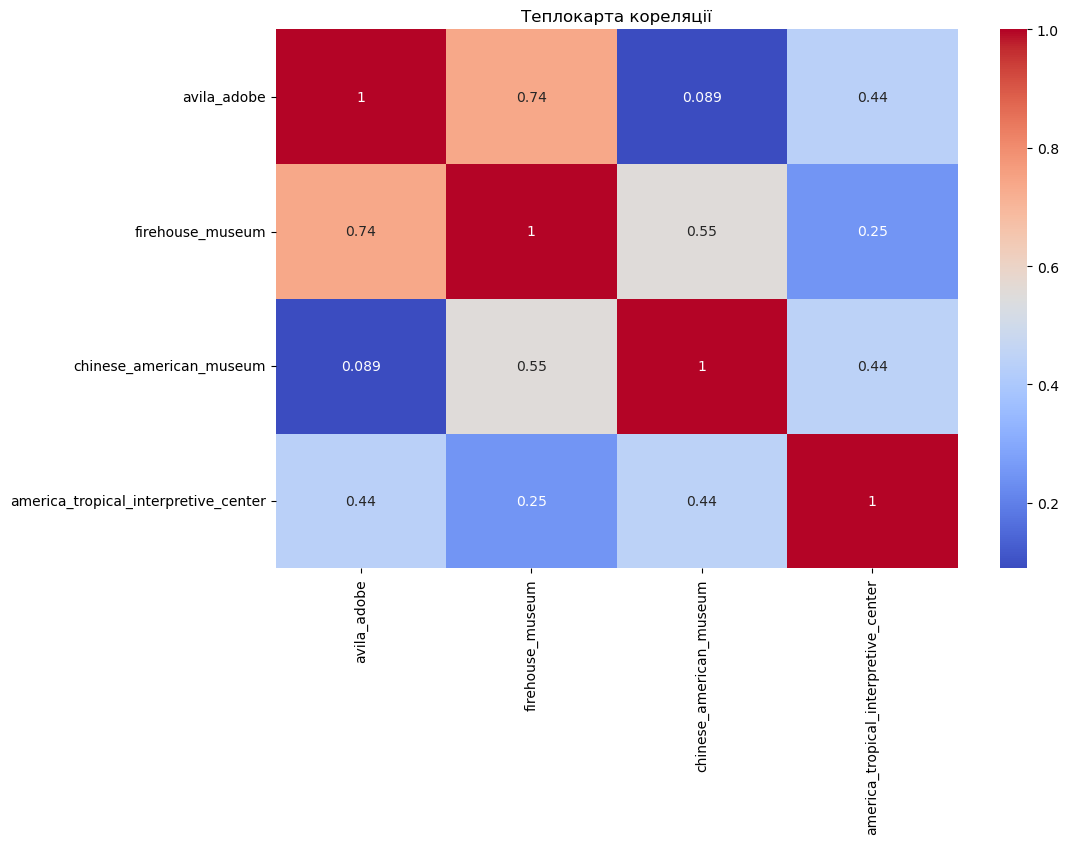

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(correlation, annot = True, cmap="coolwarm")
plt.title("Теплокарта кореляції")
plt.show()

13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

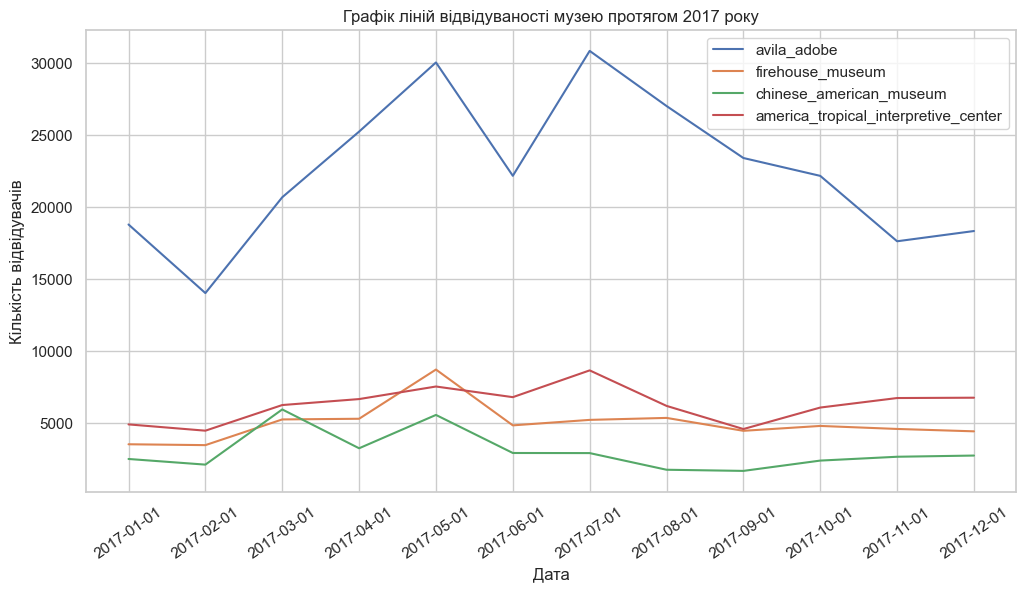

In [ ]:
data_2017 = data[data['date'].str.startswith('2017')]

sns.set(style="whitegrid")

museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

plt.figure(figsize=(12, 6))
for museum in museums:
    sns.lineplot(data=data_2017, x='date', y=data_2017[museum], label=museum)

plt.title('Графік ліній відвідуваності музею протягом 2017 року')
plt.legend(loc='upper right')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.xticks(rotation=35)
plt.show()

14. Побудувати графіки розсіювання для кожного музею за 2018 рік

C:\Users\Vika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


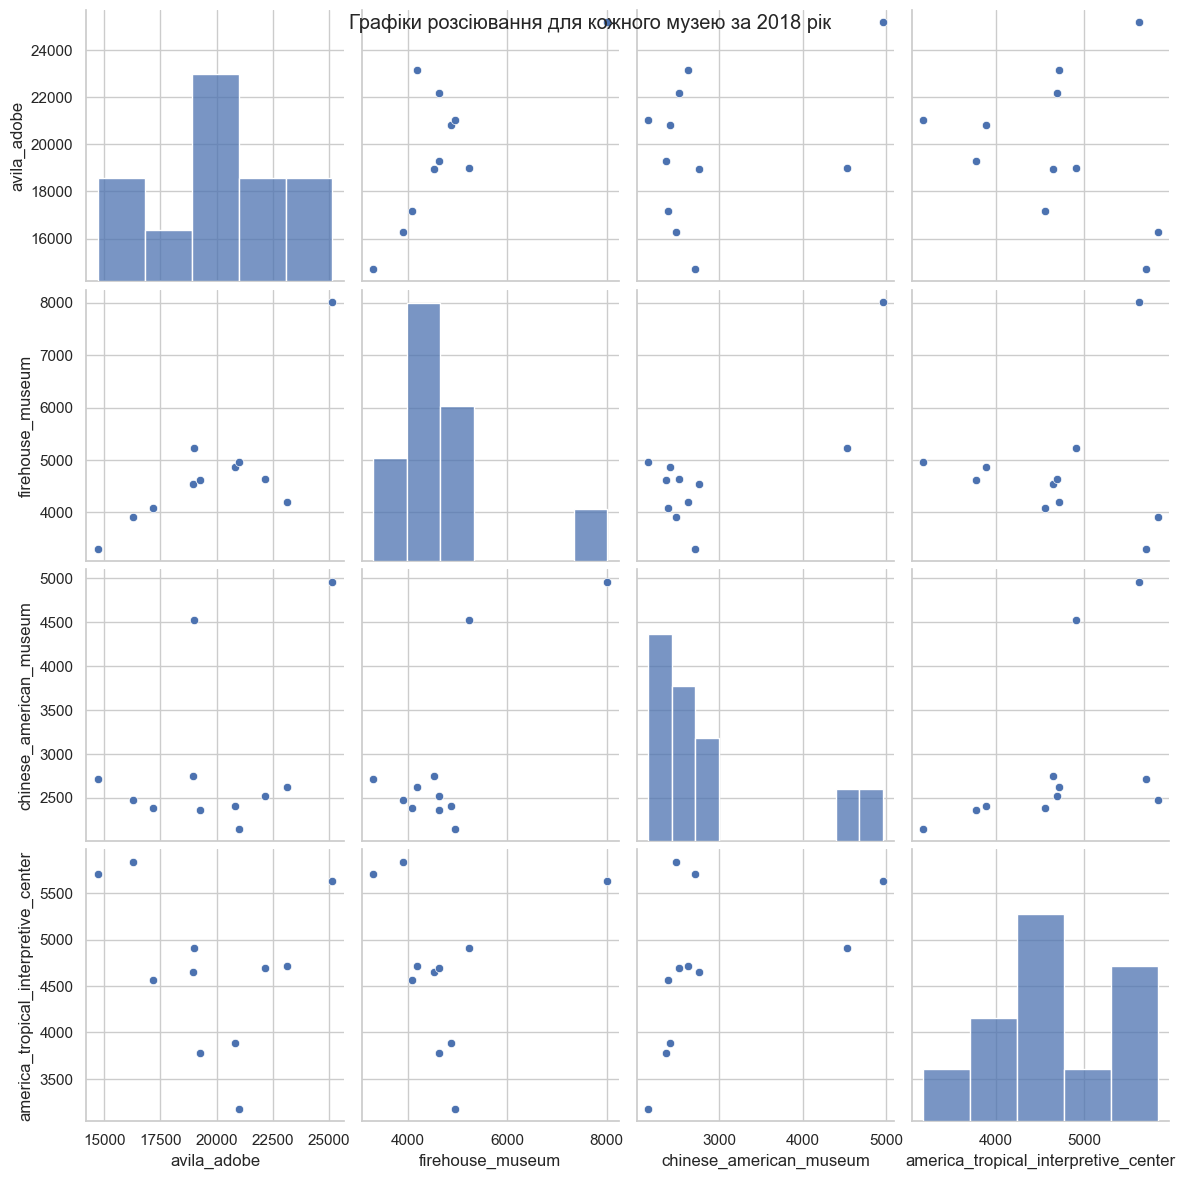

In [ ]:
sns.set(style="whitegrid")
museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
sns.pairplot(data=data_2018, vars=museums, height=3)
plt.suptitle("Графіки розсіювання для кожного музею за 2018 рік")
plt.show()

15. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

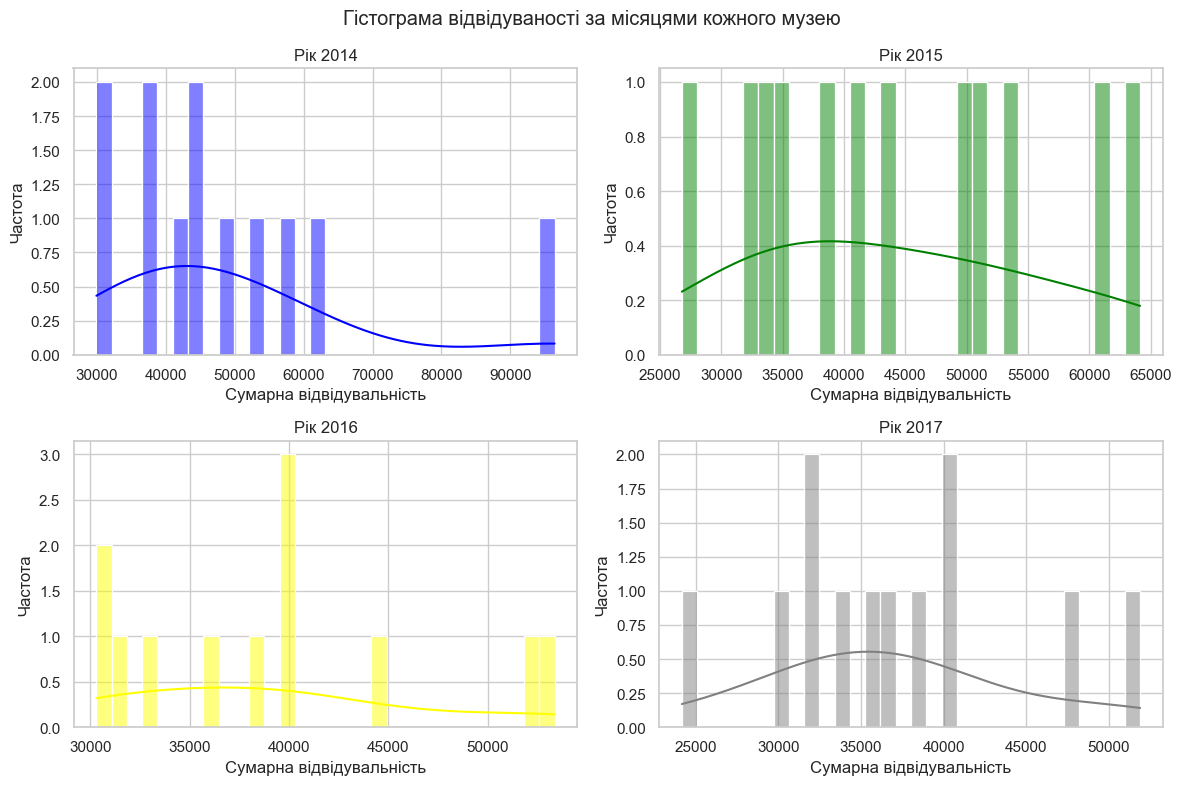

In [ ]:
data_2014 = data[data['date'].str.startswith('2014')]
sns.set(style="whitegrid")
visitors_cols = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle("Гістограма відвідуваності за місяцями кожного музею")
colors = ['blue', 'green', 'yellow', 'grey']
for i, data_year in enumerate([data_2014, data_2015, data_2016, data_2017]):
    sum_visitors = data_year[visitors_cols].sum(axis=1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data=sum_visitors, bins=30, kde = True, ax=ax, color=colors[i])
    ax.set_title(f"Рік {i + 2014}")
    ax.set_xlabel("Сумарна відвідувальність")
    ax.set_ylabel("Частота")
plt.tight_layout()
plt.grid(True)
plt.show()

Під час виконання завдання 2 Практичної роботи №7, здобуті навички обробки, аналізу та візуалізації даних.
